# <center>Lecture 1: Optimization with pen and computer</center>
## <center>Antoine Chapel (Sciences Po & PSE) </center>
## <center>Alfred Galichon's [math+econ+code](https://www.math-econ-code.org/) prerequisite class on numerical optimization and econometrics, in Python </center>
Class content by Antoine Chapel. Past and present support from Alfred Galichon's ERC grant CoG-866274 is acknowledged, as well as inputs from contributors listed [here](https://www.math-econ-code.org/team). If you reuse material from this class, please cite as:

Antoine Chapel, 'math+econ+code' prerequisite class on numerical optimization and econometrics, January 2023

#### References:
* Mathematics for Economists (Simon Blume), 1994 (Introductive)
* A First Course in Optimization Theory (Sundaram, R.), 1996
* Further Mathematics for Economic Analysis (Sydsaeter et al), 2008
* Convex Optimization (Boyde Vandenberghe), Cambridge University Press, 2004



## Outline

Optimization is an ubiquitous tool in economics. Some of it can be done on paper, some of it requires a computer. The Math+Econ+Code masterclass heavily relies on optimization techniques, which we will introduce in this lecture.

First, we will write the very general formulation of a constrained optimization problem in $\mathbb{R}^n$, which will be relevant for most of the applications you'll see. Second, we will review techniques for unconstrained, equality and inequality constrained optimization problems, in static terms. Dynamic optimization will be considered in the second lecture of these prerequisites.

Finally, we will consider more conceptual concepts such as duality and linear programming, which are core to understanding and using Optimal Transport.

I will assume that you have basic knowledge of optimization. I will not re-define formally simple concepts like local/global maximum.

### The optimization problem

In general, a maximization problem takes the following form:

\begin{align}
\max_{x\in A}  & \, f(x) \\
s.t: & \ {g}(x) = d, \\
& \ h(x) \leq e
\end{align}

$f(x)$ is the objective function. $A$ is the feasible set.
The goal of the optimization process is to find some $x^* \in A$ such that $f(x^*) \geq f(x),  \forall x \in A$ that satisfies the constraints.

We can account for three constraints: $x \in A$, ${g}(x) = d$ and $h(x) \leq e$. You should be aware that $x$ is a vector. Usually, $x$, $d$ and $e$ $\in \mathbb{R}^n$, while **g** and **h** are sets of multiple constraints. For example, if we take the vector $x$ = $[x_1, x_2]$ where $x \in \mathbb{R}^2$, we can write this simple optimization problem taken from economics:


\begin{align}
\max_{x\in \mathbb{R}^2}  & \, x_1^\frac{1}{2} \cdot x_2^\frac{1}{2} \\
s.t: & \ 2x_1 + 3x_2 = 12, \\
& \ x_1 \geq 0 \\
& \ x_2 \geq 0
\end{align}


This corresponds to the consumer utility maximisation problem every economics undergrad is familiar with. So here, we have one equality constraint, corresponding to the consumer budget constraint (Walras law incorporated), and two inequalities that impose that goods are consumed in a positive quantity.

### Solving an optimization problem
#### The existence conditions

It is useless to look for an optimum of a function if this optimum does not exist: typically, if you were to look for the unconstrained maximum of the function $f(x) = x^2$, you would only get $+\infty$. The core result that should be the first step of every optimization problem is the Weierstrass Theorem.


Weierstrass Theorem: 
Let $D \subset \mathbb{R}^n$ be a compact space. Let $f: D \rightarrow \mathbb{R}$ be a continuous function on $D$, then $f$ attains a maximum and a minimum on $D$. 

Be careful: the conditions laid down in this theorem are not necessary, but sufficient. If they are met, we are sure that there exists a max and a min. If they are not met, that doesn't mean that we can't find a max and/or a min.

Let's unpack this theorem a bit, without going too deep in topology and formal definitions: while a continuous function is rather straightforward, what is a compact space ? We economists use a simple definition that works in the restricted setting of $\mathbb{R}^n$.

* A subset $S \subset \mathbb{R}^n$  is compact if it is closed and bounded (**Heine-Borel theorem**) .

It is easy to see whether a set is closed or open in $\mathbb{R}^n$. As a reminder, if a set $X$ is open, then $\forall x \in X$, there exists an open ball of radius $r$ and centered on $x$, $B_r(x)$ included in $X$: $B_r(x) \subset X$. Reminder: in $\mathbb{R}^2$, an open ball of finite radius $r$ is a circle centered on $(0, 0)$. A set $Y$ is then said to be **closed** if its complement $Y^c = \mathbb{R}^n \setminus Y$ is open. Using this definition, $[0, 1]$ is closed, while $(0, 1)$ is open. Particular cases, the sets $\emptyset$ and $\mathbb{R}^n$ are both open and closed sets. Thus they possess the properties we are looking for. 

* A subset $S \subset \mathbb{R}^n$ is bounded when there exists $r > 0$ such that $S \subset B_r(0)$, where $B_r(0)$ again designates the **open ball** of radius $r$, centered on $0$. If, for a circle with radius large enough, you can fit the set inside the ball, then your set is bounded. For example, $[0, 1] \times [0, 1]$ is a bounded set, while $\mathbb{R}^2$ is not. Can you see why ?


So, practical guide for economists: boxes to check.

* Is the function continuous ?
* Is the set over which I am optimizing closed ?
* Can I fit this set inside an open ball ?

If you can answer yes to these three questions, you can be sure that there exists a minimum and a maximum to your optimization problem.


#### Choice of the technique.

The technique to use to solve the problem at hand depends on its type. We restrict our attention here on problems that are actually solvable with pen and paper. Problems that can't be solved this way require numerical optimization techniques, which we will study tomorrow. Techniques are usually divided in 2 steps: first-order conditions and second-order conditions.

* No constraints, you are optimizing over $\mathbb{R}^n$: Unconstrained optimization $\Rightarrow$ FOC, SOC
* Equality constraints, constraints take the form $f(x) = d$: Theorem of Lagrange
* Inequality constraints (or equality **and** inequality constraints): Karush-Kuhn-Tucker (KKT) theorem.

### Unconstrained optimization

Let us start with unconstrained optimization, for simplicity in $\mathbb{R}^2$ (but the generalization to $\mathbb{R}^n$ is straightforward). The problem takes the following form:
\begin{align}
\max_{(x, y) \in R^2}  & \, f(x, y) \\
\end{align}

FOC: We take the **Jacobian**: $Df(x, y) = \big(\frac{\partial f(x, y)}{\partial x}, \frac{\partial f(x, y)}{\partial y}\big)$
Each element of the Jacobian must be equal to $0$ at the optimum. The $n$ partial derivatives of a function in $n$ variables form a system of $n$ equations. But the solution might be a min, a max, or a saddle point. There may be several solutions to this system, some of which may be only local optimizers.

SOC: Easy procedure: use intelligence and look at the function. If it is a composite function of concave function, like $x^4 + 3x^2 - 2x + 8$, you do not need to check the Hessian to know that the function is concave. If the candidate optimum found with FOC is unique, then you have your minimum. If it is not possible to observe easily the concavity/convexity of the objective function, you need to take the more cumbersome procedure described here: 

Formal procedure: We take the **Hessian**: $D^2f(x, y) = \Bigg( \begin{matrix} 
\frac{\partial^2 f(x, y)}{\partial x^2} & \frac{\partial^2 f(x, y)}{\partial x \partial y}\\
\frac{\partial^2 f(x, y)}{\partial y \partial x} & \frac{\partial^2 f(x, y)}{\partial y^2}
\end{matrix}\Bigg)$

If you have several, say $k$, $(x^*, y^*)$ points such that $Df(x^*, y^*) = (0, 0)$, you should compute $k$ Hessians $D^2f(x^*, y^*)$ which are matrix of numbers. If the Hessian is a negative (positive) definite matrix, the point $(x^*, y^*)$ is a strict local maximum (minimum). 

Briefly, what is a positive definite matrix ? One of the way to check it is the following: For a given matrix $A = \Bigg( \begin{matrix} 
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{matrix}\Bigg)$

"Leading principal minors" are the determinants of submatrices $a_{11}$, $\Big(\begin{matrix} 
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{matrix}\Big)$, and $A$ itself. If the determinants of these three submatrices are positive, $A$ is positive definite. If you are comfortable computing eigenvalues of a matrix, you should know that a matrix is positive (negative) definite $\Leftrightarrow$ its eigenvalues are strictly positive (negative). Checking this is easily done numerically.

### Equality constrained optimization: Lagrange

While the presentation above was quite formal and general for unconstrained optimization, we will move to a more informal style for Lagrange and KKT.

A simplified consumer problem relies on the fact that agents spend all of their income to consume. This way, the budget constraint is made binding (agents do not waste money). We will solve this problem using the Lagrangian. The simplification is allowed because we know that people will not consume negative quantities, and will not waste money. So, we may simplify the problem written in the beginning of these notes as:

\begin{align}
\max_{x\in \mathbb{R}^2}  & \, x_1^\frac{1}{2} \cdot x_2^\frac{1}{2} \\
s.t: & \ 2x_1 + 3x_2 = 12
\end{align}


The Lagrangian technique consists in rewriting the problem as an unconstrained one, in the following way.

\begin{align}
\mathcal{L} =  x_1^\frac{1}{2} \cdot x_2^\frac{1}{2} + \lambda [12 - 2x_1 - 3x_2]
\end{align}

We take the FOC, w.r.t $x_1$, $x_2$ and $\lambda$:
* $\frac{\partial \mathcal{L}}{\partial x_1} = 0$
* $\frac{\partial \mathcal{L}}{\partial x_2} = 0$
* The partial derivative wrt $\lambda$, equalized to 0, simply yields the constraint

We can solve this system of equations for $x_1$, $x_2$ and $\lambda$, which yields a candidate point. Given that the Weierstrass theorem applies, there is no need to check the SOC. If the Weierstrass theorem does not apply, you may try to look at the function to check that it is globally concave/convex or try a more cumbersome procedure similar to the one used for unconstrained optimization.

One final note on $\lambda$: in the consumer utility maximization problem, it is the **shadow price**. It can be interpreted as the additional utility that would be achieved, were the constrained be relaxed by one unit.

The cumbersome procedure mentioned above is the following: 
* Compute the bordered Hessian: it is composed of four blocks which can be matrices/vectors. For easier notation, I drop the $(x, \lambda)$ after each $H$ or $\mathcal{L}$
\begin{align}
H(x, \lambda) = \Bigg( \begin{matrix} 
\frac{\partial^2 \mathcal{L}}{\partial \lambda^2} & \frac{\partial^2 \mathcal{L}}{\partial \lambda \partial x}\\
\frac{\partial^2 \mathcal{L}}{\partial x \partial \lambda} & \frac{\partial^2 \mathcal{L}}{\partial x^2}
\end{matrix}\Bigg)
\end{align}

In the example above, the bloc on the top-left would be $1 \times 1$, top-right would be $1 \times 2$, bottom-left $2 \times 1$ and bottom-right $2 \times 2$.

* Say the optimizing vector $x$ is of dimension $n$ (above, $n$ = 2) and there are $m$ binding constraints (here, $m$ = 1).
* Starting from the smallest (in size/dimension), take the $(n-m)$ largest (in size) leading principal minors of the Hessian and compute them (as defined earlier)
* If their signs alternate, starting from the sign of $(-1)^{m+1}$, then the candidate point is a local maximizer
* If their signs all have signs $(-1)^m$, then the candidate point is a local minimizer.

As you can see, this procedure is very cumbersome. It should be done only as a last resort when no other procedure can be used.

### Inequality constrained optimization: Karush-Kuhn-Tucker

When the constraint is an inequality one, an additional issue arises: some of the constraints may not be binding at the optimum. For example, in the following problem:

\begin{align}
\min_{x\in \mathbb{R}^2}  & \, x_1^2 + x_2^2 \\
s.t: & \ x_1 + x_2 \leq 3
\end{align}

It is quite clear the the optimum is $(0, 0)$. The point-vector $(0, 0)$ satisfies the constraint, which is not binding at the optimum ($0 + 0 \neq 3$). If we attempted to solve this problem like the equality constrained one, we would not obtain the actual minimum.

The KKT procedure requires that special care is attributed to signs. I suggest that you always use the following procedure in order to avoid mistakes, by rewriting the problem with a specific form:

**Maximization problem**:
\begin{align}
\max_{x\in \mathbb{R}^n}  & \, f(x) \\
s.t: & \ g(x) \leq b
\end{align}


**Minimization problem**:
\begin{align}
\min_{x\in \mathbb{R}^n}  & \, f(x) \\
s.t: & \ g(x) \geq b
\end{align}

Where $b \in \mathbb{R}$ can be $0$. You should rewrite all the constraints in a given problem with this structure.

First, we formumate the Lagrangian as before:
$\mathcal{L} = f(x) + \lambda [b - g(x)]$


Then, the KKT equations allowing you to solve the problem are the following:

\begin{align}
D\mathcal{L} = 0 \ & (FOC) \\
\lambda \geq 0\\
\lambda \cdot (b - g(x)) = 0
\end{align}


Note that $\lambda$ refers here to a vector, of dimension equal to the number of constraints. The last expression is called the complementary constraints. It reflects the fact that either $\lambda$ or $b - g(x)$ is equal to $0$. In other words, if $\lambda_{(j)}$ is different from $0$, then constraint $j$ is binding. Solving this system of equations yields the optimal point. Again, SOC should be checked, either by applying the Weierstrass theorem, looking at the objective function, or following the cumbersome procedure defined above for equality constrained optimization problems, taking only into account the binding constraints.

### Math break: a tool for optimization: SymPy

Instead of using the well-known Wolfram Alpha to perform symbolic calculus, you may use Python with just a little bit of programming.

In [1]:
from sympy import *
import numpy as np

#### Unconstrained optimization with SymPy

In [2]:
x1, x2 = symbols('x1 x2')

Let us say we want to minimize the following function: $f(x_1, x_2) = (x_1 - 1)^2 + x_1 x_2 + x_2^2$

In [3]:
obj = (x1-1)**2 + x2**2 + x1*x2
obj

x1*x2 + x2**2 + (x1 - 1)**2

In [4]:
dobj_dx1 = diff(obj, x1)
dobj_dx2 = diff(obj, x2)

In [5]:
jacobian = np.array([dobj_dx1, dobj_dx2])
jacobian

array([2*x1 + x2 - 2, x1 + 2*x2], dtype=object)

In [6]:
solve(([jacobian[0], jacobian[1]]), (x1, x2))

{x1: 4/3, x2: -2/3}

In [7]:
#hessian
hessian = np.array([diff(dobj_dx1, x1), diff(dobj_dx2, x1), diff(dobj_dx1, x2), diff(dobj_dx2, x2)], dtype='float').reshape(2, 2)
hessian

array([[2., 1.],
       [1., 2.]])

In [8]:
#Since the problem is a minimization one, we need the objective function to be convex 
# => the hessian matrix should be positive definite. An easy way to do so using numpy is to check the eigenvalues.

np.linalg.eigvals(hessian)

# Since all eigenvalues of the Hessian are positive, the Hessian is indeed positive definite. So, the candidate point (0, 0)
# is correctly the minimum of the function

array([3., 1.])

### More advanced topics in static optimization: a brief introduction to Linear Programming and Duality

Reference: Optimal Transport Methods in Economics (Galichon), Appendix B


#### Linear Programming

Linear Programming applies to a subset of optimization problems in which the objective function as well as all the constraints are linear function. Unlike nonlinear/non-convex optimization problems, linear programming problems can be solved relatively easily with numerical solvers such as Gurobi, which is used intensively in Math+Econ+Code. In particular, Optimal Transportation problems can be reformulated as Linear Programming (LP) problems.

Example:

\begin{align}
\max_{x\in \mathbb{R}^3}  & \, 4x_1 + 3x_2 \\
s.t: & \ x_1 + 2x_2 \leq 2 \\
& \ 3x_1 + x_2 \leq 3
\end{align}


This type of optimization problem can be rewritten in a general form as:

\begin{align}
V_p = \max_{x\in \mathbb{R}^n}  & \, x'c \\
s.t: & \ Ax = b \\
\end{align}

Where $c$, $x$ and $b$ are vectors and $A$ is a matrix.

In the example above,
$x = \begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}$, $c = \begin{bmatrix}
4 \\
3
\end{bmatrix}$, 
$A = \begin{bmatrix}
1 & 2 \\
3 & 1
\end{bmatrix}$, $b = \begin{bmatrix}
2 \\
3
\end{bmatrix}$

In [9]:
#The two constraints: a graphical approach

import matplotlib.pyplot as plt
import numpy as np
x1_lin = np.linspace(0, 3, 200)
c1 = (2 - x1_lin)/2
c2 = (3 - 3*x1_lin)
plt.xlim(0, 2.5)
plt.ylim(0, 3.5)
plt.plot(x1_lin, c1)
plt.plot(x1_lin, c2)
plt.fill_between(x1_lin, 0, c1, alpha=0.3)
plt.fill_between(x1_lin, 0, c2, alpha=0.3)


plt.show()

<Figure size 640x480 with 1 Axes>

\begin{align*}
4x_1 + 3x_2 &= U\\
x_2 &= \frac{U - 4x_1}{3}
\end{align*}

Let us build a function that returns an indifference curve for any level of utility $U$:

In [10]:
def indiff_curve(U):
    x1_lin = np.linspace(0, 3, 200)
    return (U - 4*x1_lin)/3

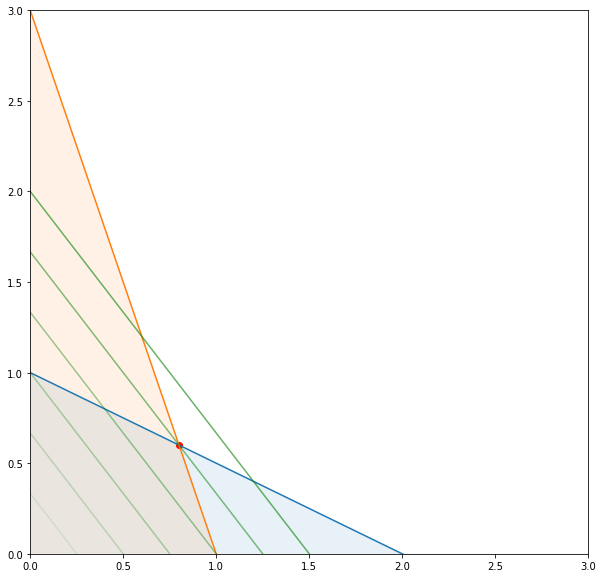

In [11]:
plt.rcParams['figure.figsize']=(10, 10)
x1_lin = np.linspace(0, 3, 200)
c1 = (2 - x1_lin)/2
c2 = (3 - 3*x1_lin)
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.plot(x1_lin, c1)
plt.plot(x1_lin, c2)
plt.fill_between(x1_lin, 0, c1, alpha=0.1)
plt.fill_between(x1_lin, 0, c2, alpha=0.1)

for U in np.linspace(1, 6, 6):
    plt.plot(x1_lin, indiff_curve(U), alpha=U/10, c='g')

plt.scatter([4/5], [3/5], c='r', alpha=1)
plt.show()

Clearly, our optimal point is on the top right kink of the feasible area: $(x_1^*, x_2^*) = (\frac{4}{5}, \frac{3}{5})$. If you think about it, the optimal solution can only be at one of the "kinks": here the corners $(0, 1), (1, 0)$ or the top-right point $(\frac{4}{5}, \frac{3}{5})$. Solvers will exploit this property to explore intelligently every option, instead of searching through the entire feasible area.

#### Duality
This presentation is heavily inspired by ["Convex Optimization"](https://web.stanford.edu/~boyd/cvxbook/) (Boyd Vandenberghe). The authors have made their book available online, so you should not hesitate to take a look at it.

Now, what is duality ? A perspective on optimization problems that yields interesting results when we apply it to topics studied in the masterclass (optimal assignment problems).

Every optimization problem can be studied from two different perspectives: the primal and the dual. So far, we have exclusively adopted the perspective of solving the **primal** problem. But any problem could be rewritten in another form, through the Lagrangian. Duality can be used for any optimization problems, but the interesting thing about the **dual** of LP problems (and **convex** optimization problems in general, is that the solution of the dual and the primal coincide if it exists.

It should also be noted that even when the primal is nonconvex (and therefore hard to solve), the dual will be convex. Although the solutions do not coincide then, the value of the dual provides a lower bound on the optimal value of the primal.

Suppose you face the following **convex** problem, written in standard form, which we will call the primal.

\begin{align}
&\min_x f_0(x)\\
\text{s.t} \hspace{6pt} f_i(x)& \leq 0, \hspace{12pt} i=1,...,m\\
h_i(x)& = 0, \hspace{12pt} i=1,...,p
\end{align}

Let us write the Lagrangian:

\begin{align}
\mathcal{L}(x, \lambda, \nu) = f_0(x) + \sum_{i=1}^m \lambda_i f_i(x) + \sum_{i=1}^p \nu_i h_i(x)
\end{align}

The Lagrange dual function $g$ is concave, and defined as follows:
\begin{align}
g(\lambda, \nu) = \inf \mathcal{L}(x, \lambda, \nu)
\end{align}

The Lagrange **dual** is defined as follows:

\begin{align}
\max g(\lambda, \nu)\\
\end{align}

This gives you an intuition of what happens under the hood of the lagrangian: each $\lambda$ penalizes one constraint. For example, for the consumption problem seen earlier, the value of the primal is actually:

\begin{align}
&\max_{x_1, x_2} U(x_1, x_2) + \min_\lambda \lambda \cdot (R - px)\\
= & \max_{x_1, x_2} \min_\lambda U(x_1, x_2) + \lambda \cdot (R - px)
\end{align}

where:
\begin{align}
\min_\lambda \lambda \cdot (R-px) = \begin{cases}
-\infty &\text{if } R-px > 0 (\lambda^* = -\infty)\\
0 &\text{if } R - px = 0 (\lambda^* = \text{ any $\lambda$)})\\
-\infty &\text{if } R-px < 0 (\lambda^* = \infty)
\end{cases}
\end{align}

Since we want to solve a **max**imization problem, we do not want the second half of the objective function to be equal to $-\infty$. Therefore it forces us to enforce the equality constraint.

This may seem a bit abstract at that stage, so let us apply it to the linear programming problem we saw earlier. The optimizer $x$ was $(\frac{4}{5}, \frac{3}{5})$, yielding a value of the $\max$: $V_p = 5$. The primal was a maximization problem, so the dual will be a minimization problem.
\begin{align}
&\max_{x} 4x_1+3x_2\\
\text{s.t} \hspace{6pt} &x_1+2x_2-2 = 0\\
&3x_1+x_2-3 = 0
\end{align}

\begin{align}
\mathcal{L}(x, \lambda) &= 4x_1+3x_2 + \lambda_1(2 - x_1 - 2x_2) + \lambda_2(3 - 3x_1 - x_2) \\
\end{align}

\begin{align}
V_d &= \min_\lambda \max_x 4x_1+3x_2 + \lambda_1(2 - x_1 - 2x_2) + \lambda_2(3 - 3x_1 - x_2)\\
&= \min_\lambda 2\lambda_1 + 3\lambda_2 + \max x_1(4 - \lambda_1 - 3\lambda_2) + x_2(3 - 2\lambda_1 - \lambda_2)
\end{align}

Now "think" of $\lambda$ as the control variable, and $x$ the lagrangian variable.

\begin{align}
&\min_\lambda 2\lambda_1 + 3\lambda_2\\
\text{s.t} \hspace{6pt} &\lambda_1 + 3\lambda_2 = 4\\
&2\lambda_1 + \lambda_2 = 3
\end{align}

We have derived the dual problem. Let us solve it, this time using scipy LP solver: linprog.

In [12]:
import numpy as np
from scipy.optimize import linprog

c_vec = np.array([2, 3])
A = np.array([[1, 3],
              [2, 1]]).astype(float)
d_vec = np.array([4, 3])

linprog(c_vec, A_eq = A, b_eq=d_vec)

C:\Users\antoi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


     con: array([-1.77635684e-15,  0.00000000e+00])
     fun: 5.000000000000001
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([1., 1.])

The value of our dual is indeed $2\lambda_1 + 3\lambda_2 = 2+3=5$.